In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [3]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

In [22]:
def clean_figure(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis="x", rotation=45)

In [4]:
sj1_tids = ['transcript_61911',
             'transcript_61913',
             'transcript_61914',
             'transcript_61916',
             'transcript_61918',
             'transcript_61921',
             'transcript_61923',
             'transcript_61924']

In [29]:
df = pd.read_csv('/Users/fairliereese/Documents/programming/mele_lab/projects/240903_pt/data/08_allele_specifics/ASTS_results_threeannots.tsv', sep='\t')
df = df.loc[(df.annot=='PODER')&\
             (df.gene_testable==True)]

In [38]:
# limit to tid, limit to variant
# df = df.loc[df['transcriptid.v'].isin(tids)]
df = df.loc[df['geneid.v'] == 'ENSG00000181991.16']
df = df.loc[df.variant=='chr15_88467745_C_T']
df['has_sj'] = df['transcriptid.v'].isin(tids)

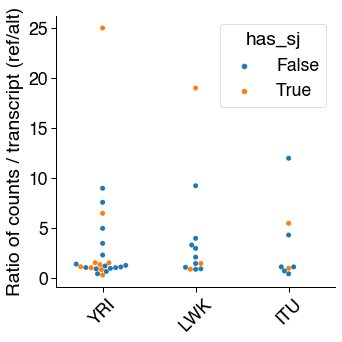

In [42]:
c_dict, order = get_population_colors()
init_plot_settings()
ax = sns.swarmplot(df, y = 'ratio', hue='has_sj', x='population', )
ax.set(ylabel='Ratio of counts / transcript (ref/alt)', xlabel='')
clean_figure(ax)

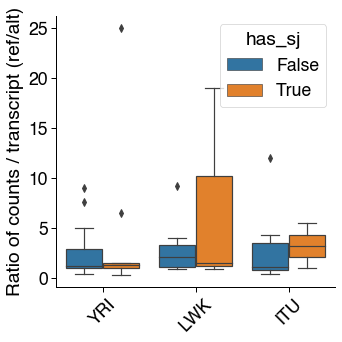

In [43]:
c_dict, order = get_population_colors()
init_plot_settings()
ax = sns.boxplot(df, y = 'ratio', hue='has_sj', x='population', )
ax.set(ylabel='Ratio of counts / transcript (ref/alt)', xlabel='')
clean_figure(ax)

In [39]:
df.columns

Index(['samplecode', 'sample', 'population', 'map_reads_assemblymap',
       'gene_variant', 'statistic', 'p.value', 'FDR', 'geneid.v',
       'transcriptid.v', 'gene_biotype', 'refCount', 'altCount', 'variant',
       'transcript_variant', 'Count', 'trx_tencounts', 'gene_numtrx',
       'gene_twentycount', 'gene_heterozygous', 'gene_testable', 'annot',
       'ratio', 'has_sj'],
      dtype='object')

In [40]:
df['ratio'] = (df['refCount']+1)/(df['altCount']+1)

In [35]:
df[['refCount', 'altCount', 'ratio', 'FDR', 'gene_testable', 'geneid.v']]

,refCount,altCount,ratio,FDR,gene_testable,geneid.v
223661,273,254,1.074510,0.002395,True,ENSG00000181991.16
223662,105,67,1.558824,0.002395,True,ENSG00000181991.16
223663,49,1,25.000000,0.002395,True,ENSG00000181991.16
223665,45,47,0.958333,0.002395,True,ENSG00000181991.16
223666,113,14,7.600000,0.002395,True,ENSG00000181991.16
223667,19,13,1.428571,0.002395,True,ENSG00000181991.16
223670,7,6,1.142857,0.002395,True,ENSG00000181991.16
223671,6,5,1.166667,0.002395,True,ENSG00000181991.16
223676,6,7,0.875000,0.002395,True,ENSG00000181991.16
235048,311,251,1.238095,0.002314,True,ENSG00000181991.16


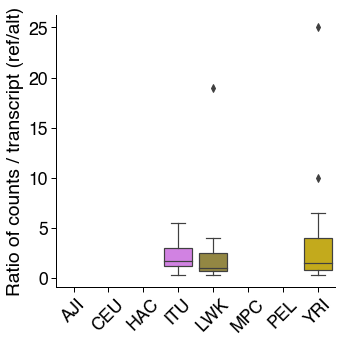

In [24]:
c_dict, order = get_population_colors()
init_plot_settings()
ax = sns.boxplot(df, y = 'ratio', x='population', palette=c_dict, order=order)
ax.set(ylabel='Ratio of counts / transcript (ref/alt)', xlabel='')
clean_figure(ax)

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


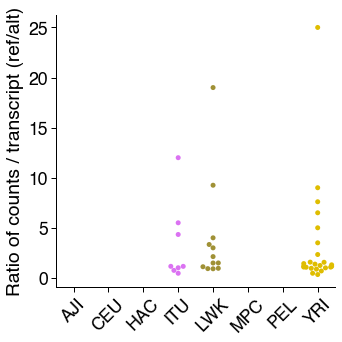

In [44]:
c_dict, order = get_population_colors()
init_plot_settings()
ax = sns.swarmplot(df, y = 'ratio', x='population', palette=c_dict, order=order)
ax.set(ylabel='Ratio of counts / transcript (ref/alt)', xlabel='')
clean_figure(ax)